In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

In [2]:
num_agents = 200
num_iterations = 100
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [3]:
default_params = [0.0020000000949949026, 0.003000000026077032, 0.15000000596046448, 0.25]
default_metrics = utils.read_csv("default.csv")[0][4:]

In [4]:
metrics = [pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[4, 5]).transpose().to_numpy()
                          for i in range(num_iterations)]

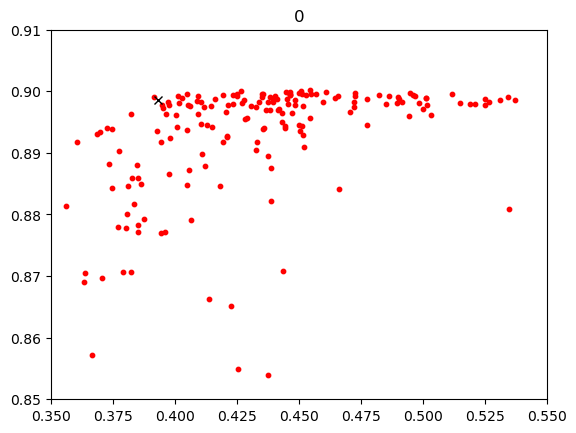

In [5]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.35, 0.55)
    ax.set_ylim(0.85, 0.91)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=1000, frames=range(num_iterations))
ani.save('history/metrics.gif', writer='pillow')


In [6]:
params = [np.transpose(pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[0, 1, 2, 3]).to_numpy())
                          for i in range(num_iterations)]
# params = []
# for i in range(num_iterations):
#     temp = utils.read_csv("history/parameters/iteration" + str(i) + ".csv")
#     params.append(np.transpose(temp))

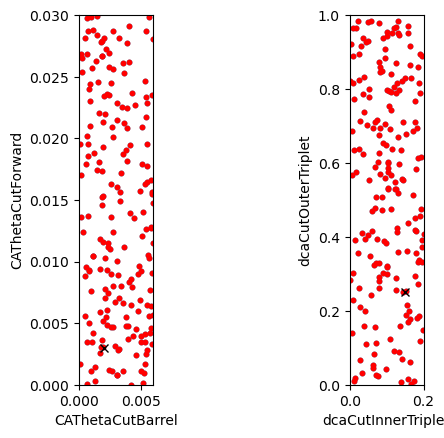

In [7]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(121, aspect='equal')
    ax.set_xlim(params_lb[0], params_ub[0])
    ax.set_ylim(params_lb[1], params_ub[1])
    s = ax.scatter(params[0][0], params[0][1], s=10)
    s = ax.scatter(params[i][0], params[i][1], c="red", s=10)
    # s = ax.scatter(params[num_iterations - 1][0], params[num_iterations - 1][1], c="green", s=10)
    s = ax.plot(default_params[0], default_params[1], c="black", marker="x")
    ax.set_xlabel(params_names[0])
    ax.set_ylabel(params_names[1])
    ax = fig.add_subplot(122, aspect='equal')
    ax.set_xlim(params_lb[2], params_ub[2])
    ax.set_ylim(params_lb[3], params_ub[3])
    s = ax.scatter(params[0][2], params[0][3], s=10)
    s = ax.scatter(params[i][2], params[i][3], c="red", s=10)
    # s = ax.scatter(params[num_iterations - 1][2], params[num_iterations - 1][3], c="green", s=10)
    s = ax.plot(default_params[2], default_params[3], c="black", marker="x")
    ax.set_xlabel(params_names[2])
    ax.set_ylabel(params_names[3])

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/params.gif', writer='pillow')

In [8]:
# def get_pareto_front():
#         pareto_front = []
#         particles = []
#         for i in range(num_iterations):
#             if i in [46, 52, 57]:
#                 continue
#             particles.append(utils.read_csv('history/particles/iteration' + str(i) + '.csv'))
#         particles = np.concatenate(particles)
                                
#         for particle in particles:
#             dominated = False
#             for other_particle in particles:
#                 if all(particle[4:] == other_particle[4:]):
#                     continue
#                 if all(particle[4:] >= other_particle[4:]):
#                     dominated = True
#                     break
#             if not dominated:
#                 pareto_front.append(particle)
#         utils.write_csv('history/pareto_front.csv', pareto_front)
#         return np.array(pareto_front)

In [9]:
# pareto_front = get_pareto_front()

In [10]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, 4].argsort()]
pareto_x = [particle[5] for particle in pareto_front]
pareto_y = [1 - particle[4] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [11]:
len(pareto_front)

211

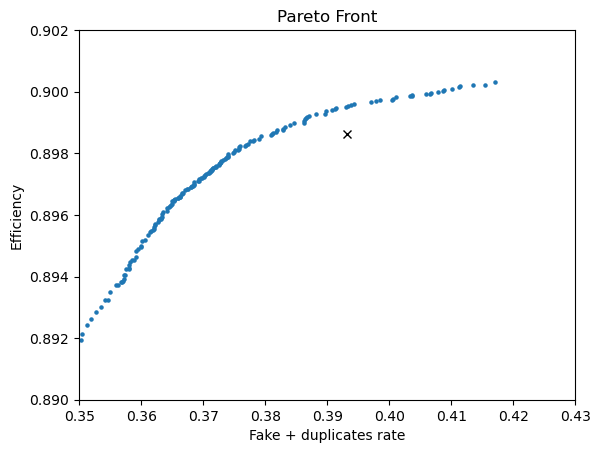

In [17]:
# point1 = pareto_front[10]
# point2 = pareto_front[45]
# point3 = pareto_front[71]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
# plt.scatter([point1[5], point2[5], point3[5]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.35, 0.43)
plt.ylim(0.89, 0.902)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.show()

In [13]:
# print([point1[i] for i in range(4)])
# print([point2[i] for i in range(4)])
# print([point3[i] for i in range(4)])

In [14]:
# print(point1)
# print(point2)
# print(point3)

In [15]:
# for i in range(num_agents):
#     uproot_file = uproot.open("test.root")
#     tree = uproot_file['simpleValidation' + str(i)]['output']
#     total_rec = tree['rt'].array()[0]
#     total_ass = tree['at'].array()[0]
#     total_ass_sim = tree['ast'].array()[0]
#     total_dup = tree['dt'].array()[0]
#     total_sim = tree['st'].array()[0]
#     print("st: %d, ast: %d, rt: %d, at: %d, dt: %d, eff: %.5f, fake+dup: %.5f" % (total_sim, total_ass_sim, total_rec, total_ass, total_dup, total_ass_sim / total_sim, (total_rec - total_ass + total_dup) / total_rec))

